# Palmer Penguins 
***

## Introduction:

This notebook contains my analysis of the famous Palmer Penguins dataset.  

Python and various external libraries within Python will be used to describe the data within the dataset, create plots for data visualization and investigate the relationship between the penguins' characteristics.  
More information for the libraries used can be found in the [README.md](https://github.com/Ange-Dvs/Princ_ODA/blob/64f1b6b6e948ce095219ce6dfc2f17c4e7617fcf/README.md)

The notebook will also include statistical analysis like probability, distribution and correlation of select variables.  
 
The notebook will be focused on three key questions: 
- If the location has influence on where a species of penguins can be found?
- Does the sex of a penguin influence the body mass?
- What is the correlation, if any, between two of the variables in the dataset (body mass and flipper length) and does adding in a 3rd variable affect the findings?



### Background of the Palmer Penguins dataset 

The Palmer Penguins dataset, originally created to study Antarctic penguins’ foraging behaviour and relationship with environmental variability, is a commonly used dataset for data exploration and visualization.  
The dataset was collected by [Dr.Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) with the [Palmer Station, Antarctica, Long-Term Ecological Research program](https://pallter.marine.rutgers.edu/).  
It is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/).  

The dataset tracks three species of penguin across three Antarctic islands measuring characteristics of the penguin i.e. flipper length, body mass, sex and bill length and depth.

##### Species:
|Adelie    |Gentoo | Chinstrap|
|-----------|---------------|------------|
|![Adelie](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg/173px-Hope_Bay-2016-Trinity_Peninsula%E2%80%93Ad%C3%A9lie_penguin_%28Pygoscelis_adeliae%29_04.jpg)|![Gentoo](https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Gentoo_Penguin_Baby_%2824940372635%29.jpg/209px-Gentoo_Penguin_Baby_%2824940372635%29.jpg)|![Chinstrap](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg/160px-South_Shetland-2016-Deception_Island%E2%80%93Chinstrap_penguin_%28Pygoscelis_antarctica%29_04.jpg)|

The version of the dataset used in this notebook focuses on a reduced number of variables from the original dataset, including:
   - Species of penguin
   - Island the penguin was found
   - Bill length and depth (mm)
   - Flipper length (mm)
   - Body mass (g)
   - Sex of the penguin

## Libraries used:
***

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from matplotlib.patches import Ellipse as elps
from tabulate import tabulate as tb

## Creating functions to reuse later in the notebook:
***


In [2]:
def plot_adelie_scatter(): # function creating a scatter plot showing only the data for the Adelie penguins, variables used in the function will be defined later in the notebook
    plt.scatter(adelie_flip_len, adelie_body_mass, color='#CF9FFF', label='Adelie') # the label for the legend and the colour of the markers are also set in the function

def plot_adelie_line(): # function adding a line to represent the correlation value for the flipper length and body mass of the Adelie penguins
    plt.plot([adelie_data['flipper_length_mm'].min(), adelie_data['flipper_length_mm'].max()], 
            [adelie_data['body_mass_g'].min(), adelie_data['body_mass_g'].max()], # plotting the line from the minimum of both variables and to the maximum
            color='#FFD700', label=(f'Adelie corr: {adelie_correlation:.2f}')) # the label tag is being used to also show the calculated correlation coefficient for the species on the plot for the reader's reference
    
def plot_gentoo_scatter(): # function creating a scatter plot showing only the data for the Gentoo penguins, variables used in the function will be defined later in the notebook
    plt.scatter(gentoo_flip_len, gentoo_body_mass, color='#87CEEB', label='Gentoo') # the label for the legend and the colour of the markers are also set in the function

def plot_gentoo_line(): # function adding a line to represent the correlation value for the flipper length and body mass of the Gentoo penguins
    plt.plot([gentoo_data['flipper_length_mm'].min(), gentoo_data['flipper_length_mm'].max()],
            [gentoo_data['body_mass_g'].min(), gentoo_data['body_mass_g'].max()], # plotting the line from the the minimum of both variables and to the maximum
            color='#FF8C00', label=(f'Gentoo corr: {gentoo_correlation:.2f}')) # the label tag is being used to also show the calculated correlation coefficient for the species on the plot for the reader's reference
    
def plot_chinstrap_scatter(): # function creating a scatter plot showing only the data for the Chinstrap penguins, variables used in the function will be defined later in the notebook
    plt.scatter(chinstrap_flip_len, chinstrap_body_mass, color='#008080', label='Chinstrap') # the label for the legend and the colour of the markers are also set in the function

def plot_chinstrap_line(): # function adding a line to represent the correlation value for the flipper length and body mass of the Chinstrap penguins
    plt.plot([chinstrap_data['flipper_length_mm'].min(), chinstrap_data['flipper_length_mm'].max()],
            [chinstrap_data['body_mass_g'].min(), chinstrap_data['body_mass_g'].max()], # plotting the line from the the minimum of both variables and to the maximum
            color='#FF4500', label=(f'Chinstrap corr: {chinstrap_correlation:.2f}')) # the label tag is being used to also show the calculated correlation coefficient for the species on the plot for the reader's reference
    
def setting_axis_limits(): # function to overwrite the range automatically populated for plots and instead use set values for ranges for the x and y axis 
    plt.ylim(2600, 6550) # setting min and max values for the y axis 
    plt.xlim(170, 233) # setting the min and max values for the y axis

## Reading in the data:
***

In [3]:
# Loading the penguins data set using the raw data link from GitHub
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

## Filtering the data:
***

Before working with the data, we will first create filters to allow us to look specifically at the data based on different values in specific fields.  
These filters will be used throughout the project for enhancing plots and allowing us to visually present a 3rd dimension in the plots using colour.

In [4]:
# Filtering the data based on the sex
female_df = df[df['sex'] == 'FEMALE']
male_df = df[df['sex'] == 'MALE']

# Filtering the dataset based on location
torgersen_df = df[df['island'] == 'Torgersen']
biscoe_df = df[df['island'] == 'Biscoe']
dream_df = df[df['island'] == 'Dream']

# Filtering the data based on the species
adelie_data = df[df['species'] == 'Adelie']
gentoo_data = df[df['species'] == 'Gentoo']
chinstrap_data = df[df['species'] == 'Chinstrap']

# Filtering the data for the flipper length and body mass
flip_len = df['flipper_length_mm'].to_numpy()
body_mass = df['body_mass_g'].to_numpy()

## First look at the data:
***
Of the variables in the dataset 3 are text based (Species of penguin, island and sex) so here the data type string would be fitting.

The remaining variables are numerical values (Bill length, bill depth, flipper length and body mass).

For bill length and bill depth we can see decimal values in the dataset, with this the suggestion for the data type to be used for those fields would be float so that Python can handle the decimal places.

Flipper length and body mass appear to be whole numbers in the dataset, while this these values don't have the restriction of needing decimal places as the numbers are currently present in the dataset technically int would be an option for them.  
However, since mathematical equations will be done using the different values in the dataset in the notebook, the suggestion would be for the data type float to also be used here. This would also be a better fit for the data type to ensure consistency across all the numeric values in the dataset.  

Bearing these thoughts in mind we will now use methods from the Pandas libraries to take a first high level look at the data.

### Checking the data types

In [5]:
#Takinng a look at the different variables in the dataset and display the data type for each
# Getting unique data types in each column
data_types = df.dtypes

# Printing the variables along with their data types
print(f'Variable:\t  Data type:\n{df.dtypes}')


Variable:	  Data type:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


Above we can see the breakdown of the data types per variable.  
As expected, we see the numeric values are of data type float.

For the variables species, island and sex we see the object data type.
Within Pandas the object data type is the most general data type and can hold any Python objects including strings. 

Next, we will take a deeper look at the numerical variables to get a quick summary of the dataset. 

#### Diving deeper into the variables

In [6]:
# Checking some basic information of the dataset
length_df = len(df) # checking the number of entries in the dataset
df_stat_summary = df.describe() # getting a summary of the numerical values in the dataset

# Displaying the summary statistics
print(f'\nThe number of rows in the dataset is {length_df}.')
print(f'\nStatistical summary of the numeric variables in the dataset:\n\n{df_stat_summary}')



The number of rows in the dataset is 344.

Statistical summary of the numeric variables in the dataset:

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


From the output of the cell above we can see a quick high level statistical overview for the numeric variables.   
We can see that there are a total of 344 lines in the dataset (excluding the headings).  

In the summary of the numeric variables, we can see that there are 342 entries in the dataset for each of the numeric variable.  
With this we could assume that each numeric column has 2 blank entries but let's do a quick check to validate if that assumption is correct.  

To verify this assumption, we can use the isna() method to check for blank cells in the CSV file.


In [7]:
# Checking for NaN values in each column and calculate the sum
nan_counts = df.isna().sum()
print(f'\nCount of blank cells per column:\n')
print(nan_counts)



Count of blank cells per column:

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


We see here that the above assumption is correct, and the numerical variables are each missing the data for two entries in the dataset.

As we have already created filters for the dataset above, we can also use these filters to only return the data based on the value selected.  
For example, if we want to specifically get the numerical summary only for the entries of the Gentoo species, we could do that using the describe() method again but instead this time using the filtered Gentoo data. 

In [8]:
# Calling describe() directly on gentoo_data
summary_stats_gentoo = gentoo_data.describe()

# Displaying the summary statistics
print(f'Gentoo data:\n{summary_stats_gentoo}')

Gentoo data:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      123.000000     123.000000         123.000000   123.000000
mean        47.504878      14.982114         217.186992  5076.016260
std          3.081857       0.981220           6.484976   504.116237
min         40.900000      13.100000         203.000000  3950.000000
25%         45.300000      14.200000         212.000000  4700.000000
50%         47.300000      15.000000         216.000000  5000.000000
75%         49.550000      15.700000         221.000000  5500.000000
max         59.600000      17.300000         231.000000  6300.000000


This ability to filter the data based on a specific value will be crucial during the analysis to enable us to separate the data and display the different groups colour coded.  
Now that we have looked at the data and summarised its values, we will start visualising the data via plots in the next sections of the notebook.

## Distribution of penguins per island:
***

For our first plot we will take a look at the breakdown of the penguins per island, checking first the number of penguins per location using Pandas and then visualising the data using Matplotlib.pyplot and Tabulate.

### Breakdown per islands

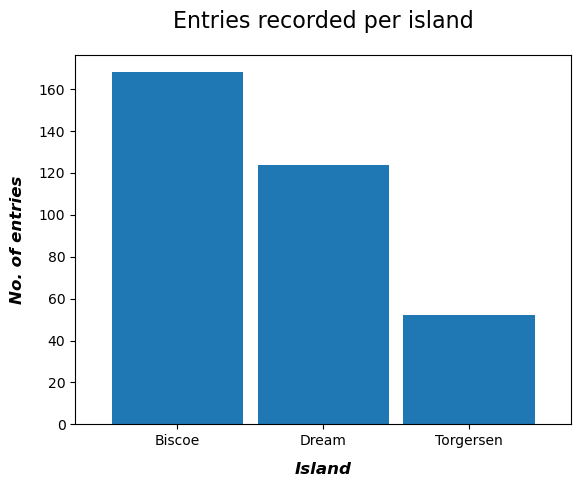

In [9]:
# Grouping the data by island and counting the number of entries
grouped_data = df.groupby('island').size()

# Plotting the bar chart and setting the width of the bars
grouped_data.plot(kind='bar', width=0.9)

# Adding title and labels to the plot
plt.title("Entries recorded per island", fontsize=16, y=1.05) # size and location of title set 
plt.xlabel("Island", fontweight='bold', fontstyle='italic', fontsize=12, labelpad=10) # size, style and location of x-axis label font set 
plt.ylabel("No. of entries", fontweight='bold', fontstyle='italic', fontsize=12, labelpad=10) # size, style and location of y-axis label font set 

plt.xticks(rotation=0) # Adjusting x-axis labels for the bars in the chart to be positioned horizontally

# Showing the plot
plt.show()

Looking at the bar chart above we can see the number of penguins per island varies.  
With majority of the penguins from the study found on Biscoe, followed by Dream and Torgersen.

Next, we will venture deeper, still looking at the breakdown per island but also considering the species per island.  

### Breakdown per islands per species

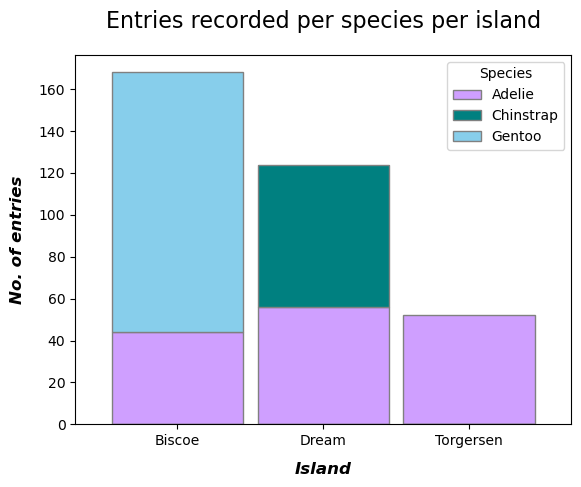

In [10]:
# Grouping the data by island & species, counting the number of entries and stacking the species per island
island_data_grouped = df.groupby(['island', 'species']).size().unstack()

# Plotting bar chart as stacked, setting a boarder around the groups of data, determining the colour of the columns and setting the width 
island_data_grouped.plot(kind='bar', stacked=True, edgecolor='grey', color=["#CF9FFF", "#008080", "#87CEEB"], width=0.9)

# Adding title and labels to the plot
plt.title("Entries recorded per species per island", fontsize = 16, y=1.05) # size and location of title set
plt.xlabel("Island", fontweight='bold', fontstyle='italic', fontsize = 12, labelpad=10) # size, style and location of x-axis label font set 
plt.ylabel("No. of entries", fontweight='bold', fontstyle='italic', fontsize = 12, labelpad=10) # size, style and location of y-axis label font set

plt.xticks(rotation=0) # Adjusting x-axis labels for the bars in the chart to be positioned horizontally
plt.legend(title="Species") # adding the legend to the chart and giving a title

# Showing the plot
plt.show()

From looking at the information colour coded per species we can learn a lot about how the different species are spread across the islands.  
Starting with the <span style="color:#CF9FFF">Adelie</span> species, there is a relatively similar number of Adelie penguins found on each island.  

For <span style="color:#008080">Chinstrap</span> we see based on the data in the dataset they are only found on the dream island.  

For <span style="color:#87CEEB">Gentoo</span> similarly this species is found only on one island, Biscoe Island.  

Next, we will do some calculations based on the data in the dataset to see what the likelihood is of finding a specific species of penguin depending on the island. 


In [11]:
# Counting the number of each species per island using the filtered sets of the data defined in the beginning of the notebook
#Torgersen data
t_adelie = torgersen_df['species'].value_counts().get('Adelie', 0) # inside the get() we are specifying which species of penguin to check for, if that species is not found 0 is returned
t_chinstrap = torgersen_df['species'].value_counts().get('Chinstrap', 0)
t_gentoo = torgersen_df['species'].value_counts().get('Gentoo', 0)

#Dream data
d_adelie = dream_df['species'].value_counts().get('Adelie', 0)
d_chinstrap = dream_df['species'].value_counts().get('Chinstrap', 0)
d_gentoo = dream_df['species'].value_counts().get('Gentoo', 0)

#Biscoe data
b_adelie = biscoe_df['species'].value_counts().get('Adelie', 0)
b_chinstrap = biscoe_df['species'].value_counts().get('Chinstrap', 0)
b_gentoo = biscoe_df['species'].value_counts().get('Gentoo', 0)

# Calculating the likelihood for a species to be found on each island
# This is done by taking the count of the species recorded on the island and dividing it by the length of the filtered dataset for that island then multiplying by 100 to give us the probability of this species being found on the island
# These steps will be replied per island & species

# Calculating for the Torgersen Island
t_adelie_likelihood = (t_adelie / len(torgersen_df)) * 100 
t_chinstrap_likelihood = (t_chinstrap / len(torgersen_df)) * 100
t_gentoo_likelihood = (t_gentoo / len(torgersen_df)) * 100

# Calculating for the Dream Island
d_adelie_likelihood = (d_adelie / len(dream_df)) * 100
d_chinstrap_likelihood = (d_chinstrap / len(dream_df)) * 100
d_gentoo_likelihood = (d_gentoo / len(dream_df)) * 100

# Calculating for the Biscoe Island
b_adelie_likelihood = (b_adelie / len(biscoe_df)) * 100
b_chinstrap_likelihood = (b_chinstrap / len(biscoe_df)) * 100
b_gentoo_likelihood = (b_gentoo / len(biscoe_df)) * 100

# Using the values calculated above we will create a table, setting the percentages to 2 decimal places
table = [
    ['Island', 'Adelie Penguin', 'Chinstrap Penguin', 'Gentoo Penguin'],
    ['Torgerson', f'{t_adelie_likelihood:.2f}%', f'{t_chinstrap_likelihood:.2f}%', f'{t_gentoo_likelihood:.2f}%'],
    ['Dream', f'{d_adelie_likelihood:.2f}%', f'{d_chinstrap_likelihood:.2f}%', f'{d_gentoo_likelihood:.2f}%'],
    ['Biscoe', f'{b_adelie_likelihood:.2f}%', f'{b_chinstrap_likelihood:.2f}%', f'{b_gentoo_likelihood:.2f}%']
]

# Print the table
print(f'Probability of each species occurrence per island:\n')
print(tb(table, headers='firstrow', tablefmt='fancy_grid'))


Probability of each species occurrence per island:

╒═══════════╤══════════════════╤═════════════════════╤══════════════════╕
│ Island    │ Adelie Penguin   │ Chinstrap Penguin   │ Gentoo Penguin   │
╞═══════════╪══════════════════╪═════════════════════╪══════════════════╡
│ Torgerson │ 100.00%          │ 0.00%               │ 0.00%            │
├───────────┼──────────────────┼─────────────────────┼──────────────────┤
│ Dream     │ 45.16%           │ 54.84%              │ 0.00%            │
├───────────┼──────────────────┼─────────────────────┼──────────────────┤
│ Biscoe    │ 26.19%           │ 0.00%               │ 73.81%           │
╘═══════════╧══════════════════╧═════════════════════╧══════════════════╛


Assuming the sample in the dataset is a true representation of the reality of all penguins in the island, we can use this data to aid in predicting what species of penguin you may find across the different islands. 

Starting with Torgerson island we see that, from the data in the dataset, the probability of a penguin found here being of the species Adelie is 100%, with no Chinstrap or Gentoo penguins found on the island.
For Dream there is a relatively equal chance in finding Adelie or Chinstrap penguins (with 45% and 55% probability respectively), while the likelihood of finding a Gentoo penguin on this island is 0.
On Biscoe Island we see almost three quarters of the penguins found in the island were Gentoo, the remaining quarter were Adelie, and no Chinstrap penguins were found. 

You could also use this data in the converse to aid in predictions of where to find a specific species of penguin. 
For example, if you were hoping to find a Gentoo penguin, we can see from the above your best choice out of the three islands would be to search on Biscoe Island. 
There may be many reasons for this including environmental conditions in the island (i.e. temperature and terrain) which may suit the Gentoo species better compared to other islands but more information which is not present in the dataset would be needed to determine the cause of why this may be the case.

Now that we have looked at the islands and the species inhabiting them, we will move to our next area of focus.

## Distribution of body mass:
***

Next, we'll look at the body mass of the penguins, first looking at the dataset as a whole. 
Then including the added factor of the sex of the penguins to see how the distribution compares across the sexes.

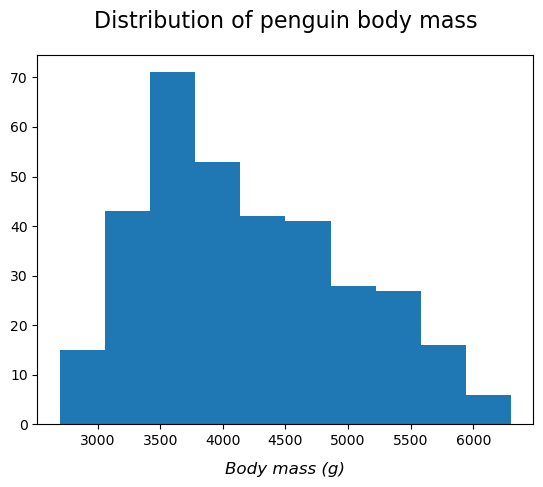

In [12]:
# Plotting a histogram showing the distribution of body mass across the dataset
plt.hist(df["body_mass_g"].to_numpy()) # selecting the data from the body mass variable in the dataset
plt.xlabel('Body mass (g)', fontstyle='italic', fontsize = 12, labelpad=10)  # setting size, style and location of x-axis label font set
plt.title("Distribution of penguin body mass",  fontsize = 16, y=1.05)  # setting size, style and location of y-axis label font set
plt.show() # showing the plot

From the histogram above we can see the distribution is unimodal with a single peak indicating that there is one dominant body mass range within the dataset.  

The result is a right-skewed histogram with the peak of the data to the left of the centre with more penguins having a lower body mass and fewer penguins having a higher body mass resulting in a gradual reduction in the size of the columns as you look further to the right of the plot.  

Overall, the data suggests that most penguins have relatively lower body masses while some outliers will have higher body mass.

Next, we will look at the body mass across both male and female penguins.

### Body mass per sex

First, we will check to see how many entries for each sex is present in the dataset to understand the sample size for each.

In [13]:
count_sex = df["sex"].value_counts() # getting the count of the male and female entries in the dataset
print(count_sex) # printing the counts

sex
MALE      168
FEMALE    165
Name: count, dtype: int64


We see that there is a relatively even number of each sex with only 3 extra entries for the male penguins.

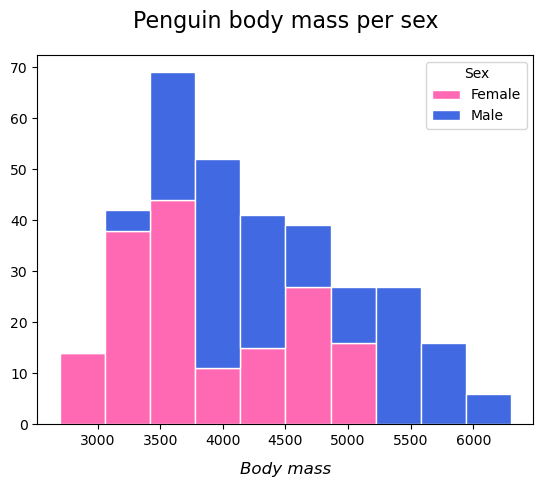

In [14]:
# Plotting a histogram showing the distribution of body mass across the dataset showing the additional context of the distribution of the body mass depending on the sex of the penguin
plt.hist([female_df['body_mass_g'].to_numpy(), male_df['body_mass_g'].to_numpy()], # selecting the body mass info for entries depending on if the sex is female or male using the filter set above
    stacked=True, # setting the bar chart as stacked
    label=['Female', 'Male'], edgecolor='white', color=['#FF69B4', '#4169E1']) # setting labels for the legend, adding white edge colour and colour of the bars.
plt.title("Penguin body mass per sex",  fontsize = 16, y=1.05) # setting plot title
plt.xlabel("Body mass", fontstyle='italic', fontsize = 12, labelpad=10) # setting size, style and location of x-axis label font

plt.legend(title="Sex") # adding the legend to the chart and giving a title
plt.show() # showing the plot

When we take the sexes of the penguins into consideration we can make some interesting observations. 

Starting with the <span style="color:#4169E1">male</span> penguins, we see the penguins which make up the right end tail of the distribution are male.  
The distribution of the body mass for male penguins appears to be broader than that of the female penguins as we can see a higher number of blue columns in the histogram.  

Now looking at the <span style="color:#FF69B4">female</span> penguins, the data would indicate that the female penguins tend to have a lower body mass compared to the males.  
Female penguins also appear to have a narrower range of distribution compared to their male counterparts which we see from the lesser number of pink columns in the histogram. 

Overall, there is overlap between the male and female penguins body mass, but we can see male penguins generally exhibit higher variability in body mass.

The broader distribution of the body mass for the males would suggest that there is a higher standard deviation than females meaning that the male penguins would be expected to vary more widely around the mean body mass while the female penguins could cluster more closely to the mean body mass.  
To assess this assumption, we will look at the standard deviation for the sexes.

In [15]:
# Calculating the standard deviation for male and female penguins
male_std = male_df['body_mass_g'].std()
female_std = female_df['body_mass_g'].std()

# Creating a table and setting the standard deviation to 2 decimal places
s_body_mass_table = [
    ['Sex', 'Standard deviation of body mass'],
    ['Male', f'{male_std:.2f} grams'],
    ['Female', f'{female_std:.2f} grams']
]

# Printing the table
print(tb(s_body_mass_table, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤═══════════════════════════════════╕
│ Sex    │ Standard deviation of body mass   │
╞════════╪═══════════════════════════════════╡
│ Male   │ 787.63 grams                      │
├────────┼───────────────────────────────────┤
│ Female │ 666.17 grams                      │
╘════════╧═══════════════════════════════════╛


Looking at the output of the calculations we can see that the standard deviation for male penguins is higher than that for female penguins which matches our prediction from the results of the histogram.  
Therefore, we can further deduce that the body masses of male penguins show more spread around the mean compared to the females.

## Comparison of flipper length vs body mass:
***

In the next section of the notebook, we'll take two variables (flipper length & body mass) and delve deeper into their relationship looking at the correlation.  
By calculating the correlation between the flipper length and body mass we will be able to better understand the strength and assess the linear relationship between the two.  

### Calculating the correlation

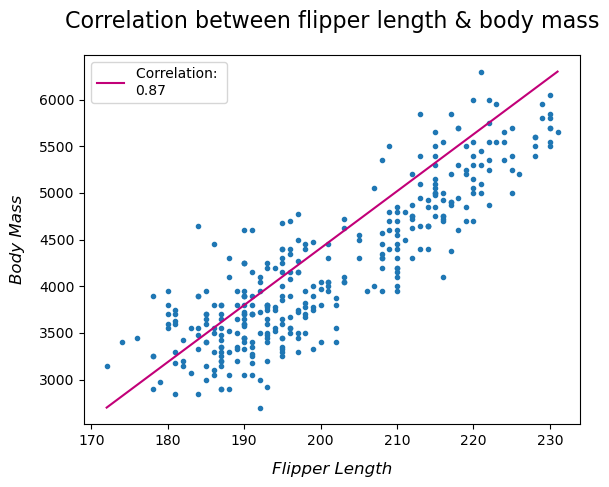

In [16]:
# Calculating the Pearson correlation coefficient between the flipper length and body mass using the .corr method.
correlation = df['flipper_length_mm'].corr(df['body_mass_g'])

# Plotting the data using the variable set for the previous plot and setting the marker type
plt.plot(flip_len, body_mass, ".")

# Adding a line representing the correlation value by plotting from the minimum of both columns to the maximum
# The label tag is being used to also show the calculation of the correlation on the plot for the user's reference
plt.plot([df['flipper_length_mm'].min(), df['flipper_length_mm'].max()],
         [df['body_mass_g'].min(), df['body_mass_g'].max()], 
         color='xkcd:magenta', label=(f'Correlation: \n{correlation:.2f}'))

# Setting the title & axis labels and defining the size, style and location of the title/labels
plt.title('Correlation between flipper length & body mass',  fontsize = 16, y=1.05)
plt.xlabel('Flipper Length', fontstyle='italic', fontsize = 12, labelpad=10)
plt.ylabel('Body Mass', fontstyle='italic', fontsize = 12, labelpad=10)

plt.legend() # creating the legend 
plt.show() # displaying the plot

The correlation coefficient of 0.87 shows a strong positive linear relationship between flipper length and body mass for the dataset.  
This is represented visually in the scatterplot above by the line in the plot sloping upwards from left to right.

This shows a high degree of predictability in the relationship between the flipper length and body mass when one increases the other also tends to increase as well.  
However, it's important to remember in the above we are only focusing on two variables flipper length and body mass across the whole dataset. 

Next, we will look another level deeper, taking the species of penguin into account as well.  
To do this first we will recreate the scatter plot but this time we will colour code the plot to show the different species.  
Then we will assess if there are any interesting patterns that can be discerned when taking the species of the penguin into account.

#### Colour coding the plot

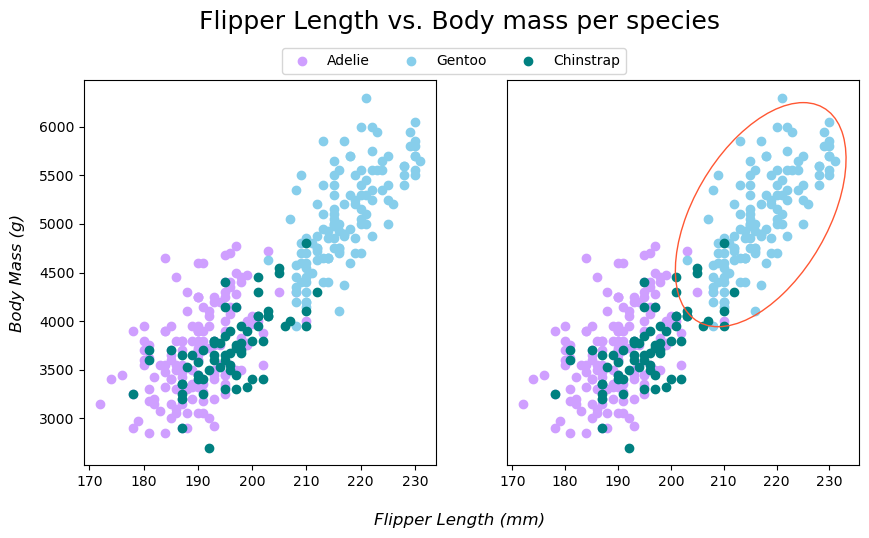

In [17]:
# Getting bill length and bill depth for different species of penguins
adelie_flip_len = adelie_data['flipper_length_mm'].to_numpy()
adelie_body_mass = adelie_data['body_mass_g'].to_numpy()

gentoo_flip_len = gentoo_data['flipper_length_mm'].to_numpy()
gentoo_body_mass = gentoo_data['body_mass_g'].to_numpy()

chinstrap_flip_len = chinstrap_data['flipper_length_mm'].to_numpy()
chinstrap_body_mass = chinstrap_data['body_mass_g'].to_numpy()

plt.figure(figsize=(10, 5)) # setting the figure size to make it easier for the user to view & read

plt.subplot(1, 2, 1)

# Plotting a scatter plot for the penguins separated per species calling the functions defined in the beginning of the notebook
plot_adelie_scatter ()
plot_gentoo_scatter ()
plot_chinstrap_scatter ()

# Setting the title & axis labels and defining the size, style and location of the title/labels
plt.ylabel('Body Mass (g)', fontstyle='italic', fontsize = 12, labelpad=10)

plt.subplot(1, 2, 2)

# Plotting a scatter plot for the penguins separating per species 
plot_adelie_scatter ()
plot_gentoo_scatter ()
plot_chinstrap_scatter ()

# Setting the parameters for the ellipse to outline Gentoo data
x_center = 217  # sets the point on the x-axis for the centre of the ellipse using the mean flipper length value (seen in Gentoo numbers summary at start of notebook)
y_center = 5095  # sets the point on the y-axis for the centre of the ellipse using the mean body mass value (seen in Gentoo numbers summary at start of notebook)
width = 28  # sets the width of the ellipse
height = 2305  # sets the height of the ellipse

# Creating the outline of the Gentoo data using the Ellipse function
ellipse = elps((x_center, y_center), width, height, angle = -0.40, edgecolor='#FF5733', facecolor='none')
# Adding the ellipse to the plot
plt.gca().add_patch(ellipse)

# Removing the markers from the y axis for second subplot as they use the same range as plot in position 1
plt.yticks([])

# Showing legend and adjusting the location and layout of the legend to make it clear the legend represents the two plots for a less cluttered image
plt.legend(loc="upper center", ncols = 3, bbox_to_anchor = (-0.15, 1.10))

plt.suptitle('Flipper Length vs. Body mass per species',  fontsize = 18, y= 1.02) # setting the title for the subplots
# Adding a super x label to replace having two separate labels for the x axis
plt.figtext(0.5, -0.01, 'Flipper Length (mm)', ha='center', fontsize=12, fontstyle='italic')
# Showing the plot
plt.show()

When the different species are represented by colour in the plot, distinct clusters are visible depending on the species.  
For the <span style="color:#CF9FFF">Adelie</span> and <span style="color:#008080">Chinstrap</span> penguins there is an overlap, which indicates there are similarities between these two species when it comes to the body mass and flipper length characteristics.  

In contrast, the <span style="color:#87CEEB">Gentoo</span> species appears as more of an outlier and with far less overlap seen compared to the other two species in the plot (highlighted by the orange outline in the second plot above).
With this we can assume that the Gentoo penguin would be more likely to have different body proportions compared to the Adelie and Chinstrap penguin.

From the plot we can deduce that while it would be difficult to distinguish between an Adelie and Chinstrap penguin knowing only the flipper length and body mass, it would be much easier to identify whether a penguin is a Gentoo or not using the same criteria.

Next, we'll look plotting the correlation per species. 

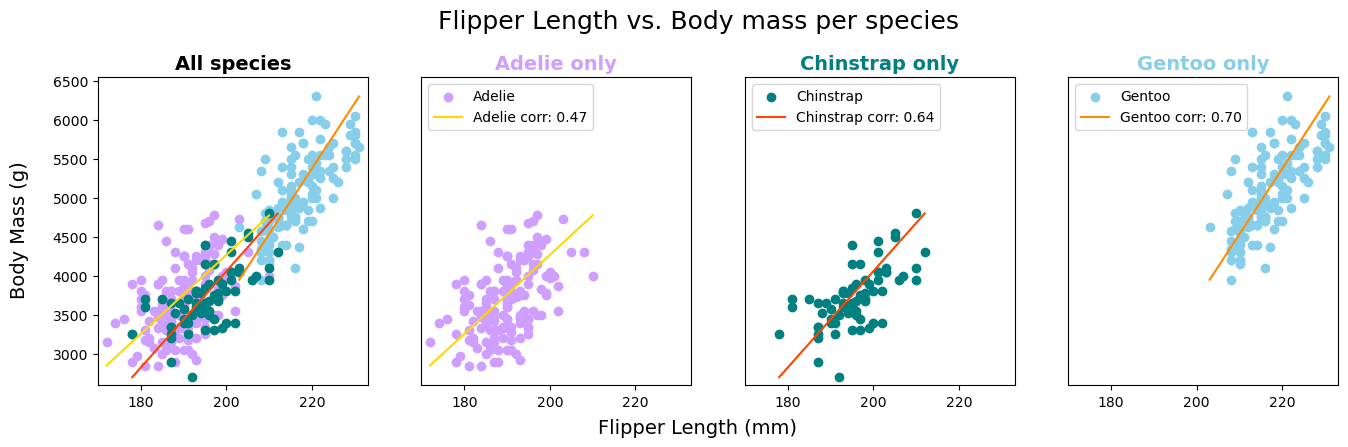

In [18]:
# Calculating the Pearson correlation coefficient between the flipper length and body mass again using the .corr method
adelie_correlation = adelie_data['flipper_length_mm'].corr(adelie_data['body_mass_g'])
gentoo_correlation = gentoo_data['flipper_length_mm'].corr(gentoo_data['body_mass_g'])
chinstrap_correlation = chinstrap_data['flipper_length_mm'].corr(chinstrap_data['body_mass_g'])

plt.figure(figsize=(16, 4)) # setting the size of the plot to be wider than the default to comfortably show the subplots

# Creating a subplot displaying data for all species
plt.subplot(1, 4, 1) 
# Plotting a scatter plot & line plot for the penguins separating per species 
plot_adelie_scatter()
plot_adelie_line()
plot_gentoo_scatter()
plot_gentoo_line()
plot_chinstrap_scatter()
plot_chinstrap_line()
setting_axis_limits()
plt.title('All species',  fontsize = 14, y=1, fontweight='bold') # Setting the title & axis labels and defining the size, style and location of the title/labels

# Creating a subplot displaying data for only Adelie data
plt.subplot (1, 4, 2) 
plot_adelie_scatter()
plot_adelie_line()
setting_axis_limits()
plt.title('Adelie only',  fontsize = 14, y=1, color='#CF9FFF', fontweight='bold')
plt.yticks([])
plt.legend(loc = "upper left")

# Creating a subplot displaying data for only Gentoo data
plt.subplot (1, 4, 3) 
plot_chinstrap_scatter()
plot_chinstrap_line()
plt.title('Chinstrap only',  fontsize = 14, y=1, color='#008080', fontweight='bold')
setting_axis_limits()
plt.yticks([])
plt.legend(loc = "upper left")

# Creating a subplot displaying data for only Chinstrap data
plt.subplot (1, 4, 4)
plot_gentoo_scatter()
plot_gentoo_line()
plt.title('Gentoo only',  fontsize = 14, y=1, color='#87CEEB', fontweight='bold')
setting_axis_limits()
plt.yticks([])
plt.legend(loc = "upper left")

# Adding a super title for the plot 
plt.suptitle('Flipper Length vs. Body mass per species',  fontsize = 18, y=1.05)
# Adding a super x label
plt.figtext(0.5, -0.01, 'Flipper Length (mm)', ha='center', fontsize=14)
# Adding a super y label
plt.figtext(0.07, 0.5, 'Body Mass (g)', va='center', rotation='vertical', fontsize=14)
# Showing the plot
plt.show()

When we first looked at the correlation overall between the flipper length and body mass, we saw the correlation coefficient was 0.87 which would indicate a strongly positive correlation. 
Notably, when we separate the data out per species above, we see that the correlation varies with some species having a stronger positive correlation than others.

Starting with the Adelie data, we see these penguins have the weakest correlation between the flipper length and body mass with the correlation coefficient being 0.47. 
It could be said that it is still true that as one variable increase the other would be likely to increase as well but the relationship is not extremely strong for the Adelie penguins. 

Looking next at the Chinstrap data, we see the correlation coefficient is 0.64 which indicates there is a stronger positive relationship for the flipper length and body mass of the Chinstrap penguins compared to the Adelie. However, the corelation is still weaker than that seen when looking at all species as one.

Lastly looking at the Gentoo data, we see the strongest relationship of the individual species with the correlation coefficient being 0.70.

This implies that there is in fact an effect on the correlation between the two variables depending on the species as the relationship between the flipper length and body mass varies across the penguin species, with some showing a stronger connection than others.  

# Conclusion: 
***

Throughout this notebook we have delved into multiple variables in the dataset.  

We have seen the distribution of penguins across the different islands, examined the range in body mass among the entries in the dataset and investigated the relationship between the flipper length and body mass, also seeing how species can affect our understand of the correlation between the two.

Python lies at the core of this analysis, using multiple external libraries to visualize and interpret the large dataset effectively and help generate meaningful insights. 

Our key questions raised in the beginning have been answered. 

The probability of finding a specific species of penguin is affected depending on the island.  
The sex of a penguin matters when looking at the range in body mass.  
While there is a strong positive correlation between the body mass and flipper length when considering the dataset as a whole, when the species is taken into consideration we see that the correlation varies depending on the individual species and that it was not as strong of a correlation as initially thought when looking at all of the species collectively.  

This helps highlight the importance of delving deeper into the data and how considering additional variables can help in having a more insightful visualisation of the data.
From the statistical analysis we can now go forward with a better understand of the Palmer Penguins dataset and the variables within.

***
### End